Healthcare Calculator

In [ ]:
# Load in the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')
import kagglehub
import os


# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [ ]:
# Load the Data

)

df = pd.read_csv(f"{path}/insurance.csv")

100%|██████████| 16.0k/16.0k [00:00<00:00, 17.2MB/s]

Extracting files...


In [ ]:
# Initial View of Data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print('Dataset Info:')
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Data information
print('Dataset Descriptive Stats:')
df.describe()

Dataset Descriptive Stats:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check for missing values
print('Missing values per column:')
missing_values = df.isnull().sum()
print(missing_values)

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Text(0, 0.5, 'Frequency')

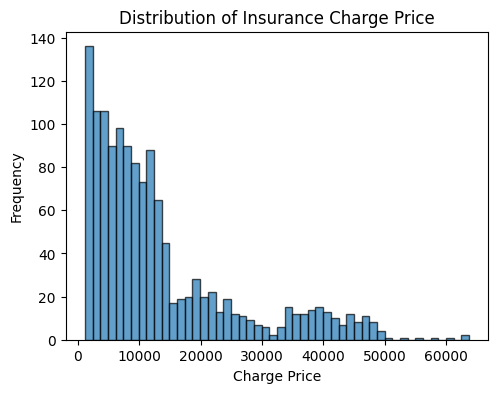

In [ ]:
# Target Variable Distribution
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins = 50, edgecolor ='black', alpha=0.7)
plt.title('Distribution of Insurance Charge Price')
plt.xlabel('Charge Price')
plt.ylabel('Frequency')



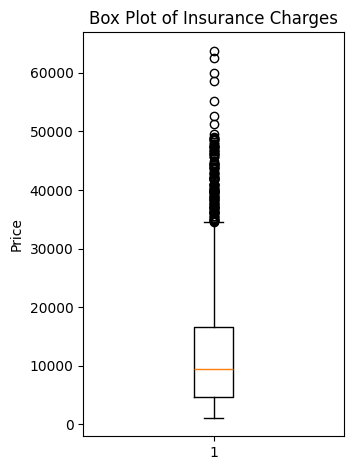

In [ ]:
plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.title('Box Plot of Insurance Charges')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [ ]:
print("Min charge:", df['charges'].min())
print("Max charge:", df['charges'].max())


Min charge: 1121.8739
Max charge: 63770.42801


In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex'], prefix=['Gender'], drop_first = True)

df_encoded.head()

,age,bmi,children,smoker,region,charges,Gender_male
0,19,27.900,0,yes,southwest,16884.92400,False
1,18,33.770,1,no,southeast,1725.55230,True
2,28,33.000,3,no,southeast,4449.46200,True
3,33,22.705,0,no,northwest,21984.47061,True
4,32,28.880,0,no,northwest,3866.85520,True


In [ ]:
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})


In [ ]:

mean_encoded = df_encoded.groupby('region')['charges'].mean()
df_encoded['region_encoded'] = df_encoded['region'].map(mean_encoded)


In [ ]:
df_encoded.head(20)

,age,bmi,children,smoker,region,charges,Gender_male,region_encoded
0,19,27.900,0,1,southwest,16884.92400,False,12346.937377
1,18,33.770,1,0,southeast,1725.55230,True,14735.411438
2,28,33.000,3,0,southeast,4449.46200,True,14735.411438
3,33,22.705,0,0,northwest,21984.47061,True,12417.575374
4,32,28.880,0,0,northwest,3866.85520,True,12417.575374
5,31,25.740,0,0,southeast,3756.62160,False,14735.411438
6,46,33.440,1,0,southeast,8240.58960,False,14735.411438
7,37,27.740,3,0,northwest,7281.50560,False,12417.575374
8,37,29.830,2,0,northeast,6406.41070,True,13406.384516
9,60,25.840,0,0,northwest,28923.13692,False,12417.575374


In [ ]:
df_encoded['Gender_male'] = df_encoded['Gender_male'].astype(int)

In [ ]:
df_encoded = df_encoded.select_dtypes(include='number')

In [ ]:
df_encoded.head()

,age,bmi,children,smoker,charges,Gender_male,region_encoded
0,19,27.900,0,1,16884.92400,0,12346.937377
1,18,33.770,1,0,1725.55230,1,14735.411438
2,28,33.000,3,0,4449.46200,1,14735.411438
3,33,22.705,0,0,21984.47061,1,12417.575374
4,32,28.880,0,0,3866.85520,1,12417.575374


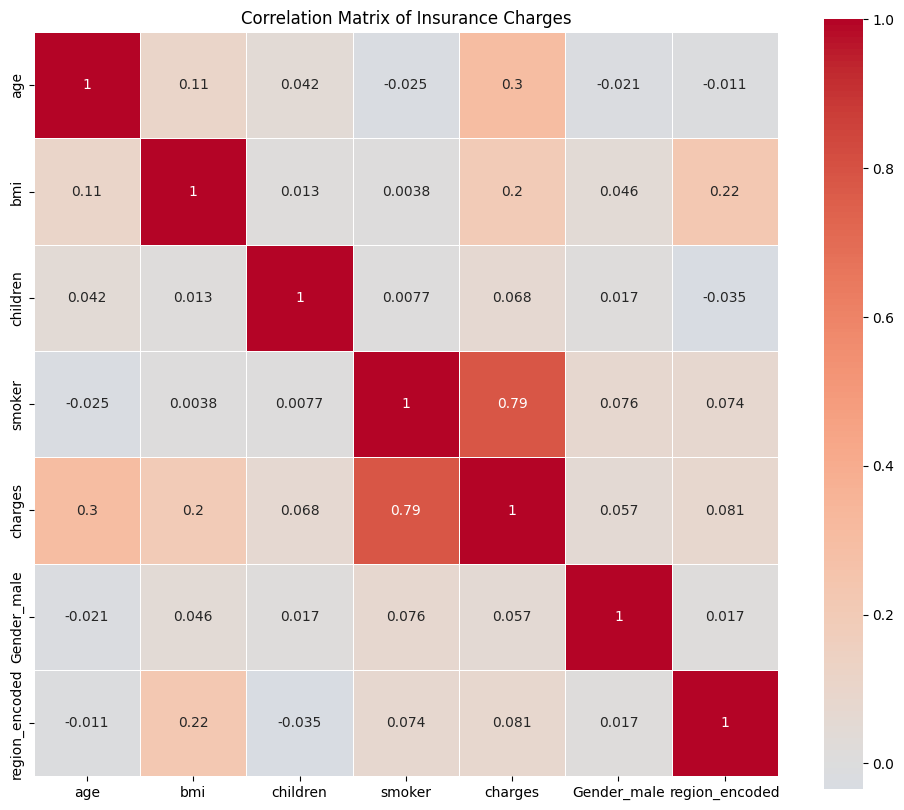

In [ ]:

plt.figure(figsize=(12,10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center = 0, square =True, linewidths =0.5)
plt.title('Correlation Matrix of Insurance Charges')
plt.show()

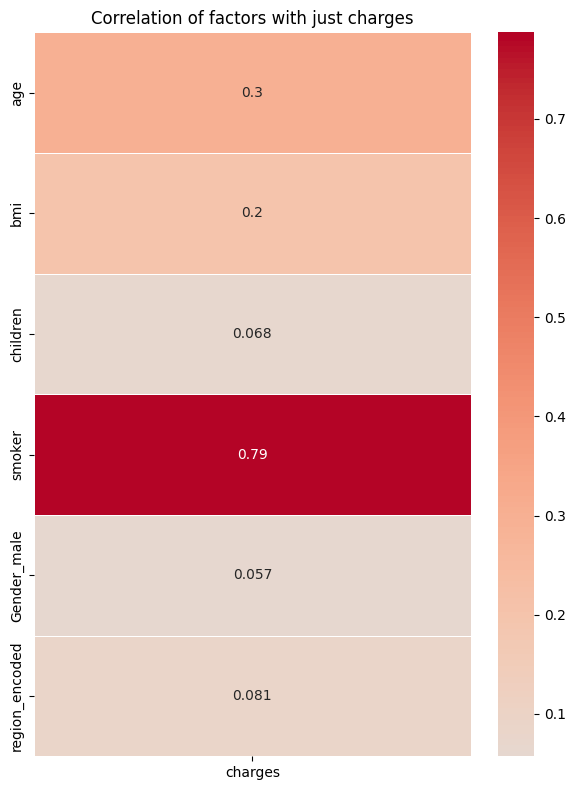

In [ ]:
series = df_encoded.corr()['charges'].drop('charges')
charges_cm = series.to_frame(name='charges')

plt.figure(figsize=(6, 8))
sns.heatmap(charges_cm, annot=True, cmap='coolwarm', center=0, square=False, linewidths=0.5)
plt.title('Correlation of factors with just charges')
plt.tight_layout()
plt.show()

Train Test-Split

In [ ]:
df_encoded.head()

,age,bmi,children,smoker,charges,Gender_male,region_encoded
0,19,27.900,0,1,16884.92400,0,12346.937377
1,18,33.770,1,0,1725.55230,1,14735.411438
2,28,33.000,3,0,4449.46200,1,14735.411438
3,33,22.705,0,0,21984.47061,1,12417.575374
4,32,28.880,0,0,3866.85520,1,12417.575374


In [ ]:
X = df_encoded.drop('charges', axis= 1)

In [ ]:
y = df_encoded['charges']

In [ ]:
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (1338, 6)
Target shape: (1338,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# take a look at the shapes of the training and testing sets
print(f'\n Training set shape {X_train.shape}')
print(f'Test set shape {X_test.shape}')
print(f'Training target set shape {y_train.shape}')
print(f'Testing target set shape {y_test.shape}')


 Training set shape (1070, 6)
Test set shape (268, 6)
Training target set shape (1070,)
Testing target set shape (268,)


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

type(X_train_scaled)

numpy.ndarray

In [ ]:
# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)


In [ ]:
print('After Scaler - Training set statistics')
print(X_train_scaled.describe())

After Scaler - Training set statistics
                age           bmi      children        smoker   Gender_male  \
count  1.070000e+03  1.070000e+03  1.070000e+03  1.070000e+03  1.070000e+03   
mean  -1.992176e-16 -4.648410e-17 -2.324205e-17  2.988264e-17 -6.308557e-17   
std    1.000468e+00  1.000468e+00  1.000468e+00  1.000468e+00  1.000468e+00   
min   -1.518194e+00 -2.417060e+00 -9.111921e-01 -5.087470e-01 -1.024602e+00   
25%   -8.784157e-01 -7.210253e-01 -9.111921e-01 -5.087470e-01 -1.024602e+00   
50%    1.016470e-02 -5.800739e-02 -8.842793e-02 -5.087470e-01  9.759891e-01   
75%    8.276587e-01  6.515707e-01  7.343363e-01 -5.087470e-01  9.759891e-01   
max    1.751782e+00  3.736342e+00  3.202629e+00  1.965613e+00  9.759891e-01   

       region_encoded  
count    1.070000e+03  
mean    -1.938221e-15  
std      1.000468e+00  
min     -9.334772e-01  
25%     -8.612537e-01  
50%      1.497496e-01  
75%      1.508607e+00  
max      1.508607e+00  


In [ ]:
multiple_model = LinearRegression()

# training the model
multiple_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = multiple_model.predict(X_train_scaled)

y_pred_test = multiple_model.predict(X_test_scaled)


In [ ]:
# calculate performance metrics for both training and testing sets
def calculate_metrics(y_true, y_pred, dataset):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  print(f'Performance Metrics: {dataset}')
  print(f"Mean Squared Error (MSE): {mse:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  print(f"Mean Absolute Error (MAE): {mae:.4f}")
  print(f"R-squared (R²) Score: {r2:.4f}")

In [ ]:
# Training test performance
calculate_metrics(y_train, y_pred_train, 'Training')

Performance Metrics: Training
Mean Squared Error (MSE): 37369443.2380
Root Mean Squared Error (RMSE): 6113.0551
Mean Absolute Error (MAE): 4210.2406
R-squared (R²) Score: 0.7411


In [ ]:
# Testing Data Performance
calculate_metrics(y_test, y_pred_test, 'Testing')

Performance Metrics: Testing
Mean Squared Error (MSE): 33993128.2127
Root Mean Squared Error (RMSE): 5830.3626
Mean Absolute Error (MAE): 4214.3874
R-squared (R²) Score: 0.7810


In [ ]:
# Random Forests

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
train_pred = rf.predict(X_train_scaled)
test_pred = rf.predict(X_test_scaled)

In [ ]:
calculate_metrics(y_train, train_pred, "Training Set")


Performance Metrics: Training Set
Mean Squared Error (MSE): 3713835.2157
Root Mean Squared Error (RMSE): 1927.1313
Mean Absolute Error (MAE): 1058.0955
R-squared (R²) Score: 0.9743


In [ ]:
calculate_metrics(y_test, test_pred, "Testing Set")

Performance Metrics: Testing Set
Mean Squared Error (MSE): 21226927.2460
Root Mean Squared Error (RMSE): 4607.2690
Mean Absolute Error (MAE): 2551.7384
R-squared (R²) Score: 0.8633


In [ ]:
# download the model

joblib.dump(rf, 'model1.pkl')

from google.colab import files
files.download('model1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>